### Classifier using three timesteps 
#### rows 0-2, ~27.4 years

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
planets = pd.read_csv('7306ts.csv', skipinitialspace=True)
print(planets.columns)

Index(['run', 'planet', 'initial e', 'final e', 'mean e', 'min e', 'max e',
       'sd e', 'initial pericenter', 'final pericenter', 'mean pericenter',
       'min pericenter', 'max pericenter', 'sd pericenter', 'initial jacobi',
       'final jacobi', 'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi',
       'initial mhr1', 'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1',
       'sd mhr1', 'initial mhr2', 'final mhr2', 'mean mhr2', 'min mhr2',
       'max mhr2', 'sd mhr2', 'initial a1_ratio', 'final a1_ratio',
       'mean a1_ratio', 'min a1_ratio', 'max a1_ratio', 'sd a1_ratio',
       'initial a2_ratio', 'final a2_ratio', 'mean a2_ratio', 'min a2_ratio',
       'max a2_ratio', 'sd a2_ratio', 'initial mass1_ratio',
       'final mass1_ratio', 'mean mass1_ratio', 'min mass1_ratio',
       'max mass1_ratio', 'sd mass1_ratio', 'initial mass2_ratio',
       'final mass2_ratio', 'mean mass2_ratio', 'min mass2_ratio',
       'max mass2_ratio', 'sd mass2_ratio', 'end time', 'fate'],


###### Classifies as type of instability (ejection, remaining, planet-planet collision, central body collision).

> Is currently ~74.66% accurate

In [7]:
fates = list(set(planets['fate']))
types = {fates[i] : i for i in range(len(fates))}
int_dict = {i : fates[i] for i in range(len(fates))}
classes = planets['fate'].map(types)

###### Classifies as either stable or unstable.
> Is currently 88% accurate

Second cell is the hard coded version

In [ ]:
fates = np.sort(list(set(planets['fate']))) [::-1]

types = {fates[i] : i for i in range(len(fates))}

classes = planets['fate'].map(types)

for i in range(len(classes)):
    if classes[i] == 0:
        pass
    else:
        classes[i] = 1

In [14]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

###### Training

In [15]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

ids_train = features_train['planet'].to_numpy()
features_train.drop(['run', 'planet', 'fate', 'end time'], axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(['run', 'planet', 'fate', 'end time'], axis=1, inplace=True)
features_test = features_test.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
classifier = GradientBoostingClassifier(random_state=7)
classifier.fit(features_train, classes_train)

GradientBoostingClassifier(random_state=7)

In [17]:
classes_predict = classifier.predict( features_test )
print('Classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

Classifier is  88.0 % accurate on testing set


###### Feature importance

In [12]:
feats=classifier.feature_importances_
inds=np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

max jacobi 0.18893716730625884
initial a2_ratio 0.09634790433321441
sd e 0.08919577030724143
final jacobi 0.078658790011065
max e 0.07372281959808041
final e 0.07145607266541582
final pericenter 0.04292184389332521
initial a1_ratio 0.03319920279738483
initial jacobi 0.03264608889006935
min jacobi 0.017827078602301497
initial e 0.016327922319387716
min e 0.015706850632450836
max mhr2 0.015358718632842475
mean a2_ratio 0.014641841076766401
min pericenter 0.011781323084987859
final mass2_ratio 0.010733025906130829
min mhr2 0.010173543727710942
mean jacobi 0.009288016639082668
min mhr1 0.009184005842373477
max mhr1 0.008510210606110695
initial mhr1 0.008470641909045756
final a1_ratio 0.00837191338527416
sd jacobi 0.008342763674335577
initial mass2_ratio 0.008171274786695165
max a1_ratio 0.007954190859644035
initial mhr2 0.0075365157939307
sd pericenter 0.007043946592514759
min a1_ratio 0.006412400577378033
initial mass1_ratio 0.006232445176854792
sd a1_ratio 0.0058667884087651575
sd mhr2 0

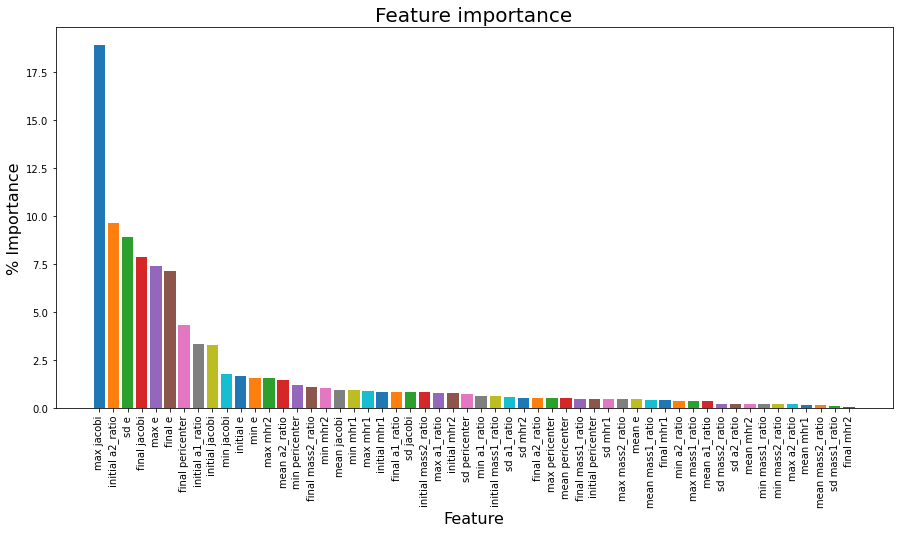

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pylab


f=plt.figure(figsize=(15,7))

for i in range(len(inds)):
    plt.bar(cols[inds[i]], feats[inds[i]] * 100)
    

 
plt.ylabel('% Importance', size=16)
plt.xlabel('Feature', size=16)
plt.title('Feature importance', size=20)
plt.xticks(rotation = 90)
plt.show()